In [3]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [4]:
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])


#list with the mean values
mean_list= df.mean(axis = 1, skipna = True).tolist()



#list with the margin error
std_list= df.std(axis = 1, skipna = True).tolist() 
number_of_samples=df.count(axis=1).tolist()[1]
yerr = []
for i in range (4) :
    yerr.append(1.96*(std_list[i]/math.sqrt(number_of_samples)))

<IPython.core.display.Javascript object>


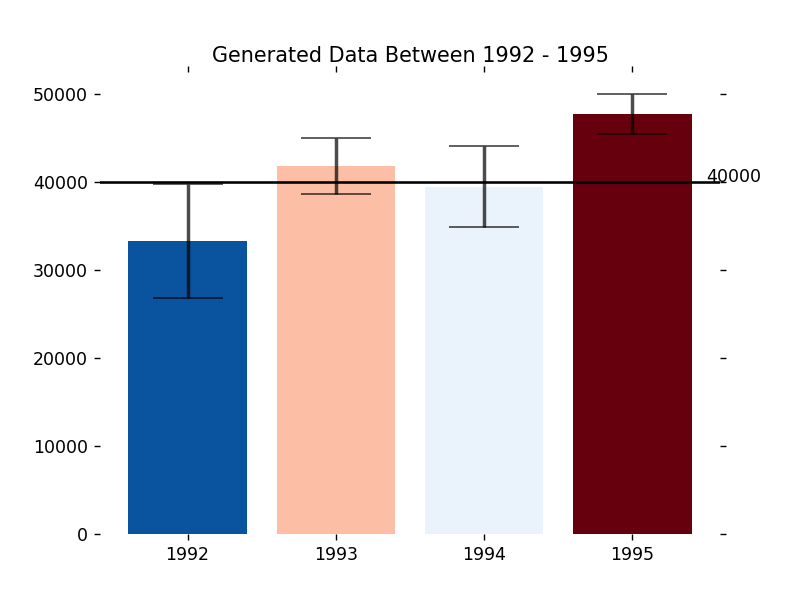

In [5]:
#read the y
y_new=40000
plt.text(1995.5, y_new, y_new)


#draw the horizontal line
mpl.pyplot.axhline(y=y_new, xmin=0, xmax=1,label = 'Y',c='black') #chnge the colour of the line
    

#find a value that shows the shade for each mean according to the input y from -1 to 1
pos_neg=[x - y_new for x in mean_list]
max_abs=abs(max(pos_neg, key=abs))    
shades=[x / max_abs for x in pos_neg]



#find the colour ranges  from cmap
from matplotlib import cm
blues=cm.Blues
reds=cm.Reds
colours=['white' if x==0 else blues(abs(x)) if x<0 else reds(abs(x)) for x in shades]

    
    
#plot the mean with the error
xvals = [1992,1993,1994,1995]
plt.bar(xvals, mean_list,yerr=yerr, error_kw={'capsize': 20, 'elinewidth': 2, 'alpha':0.7},color=colours)
plt.xticks(xvals, ['1992','1993','1994','1995'])



plt.title('Generated Data Between 1992 - 1995')

# remove all the ticks , and tick labels on the Y axis
plt.tick_params(top='off', bottom='off',  right='off', labelbottom='on')


# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)